In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [2]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [3]:
# Define convolutional autoencoder model for resolution increase
input_img = Input(shape=(32, 32, 3))  # Input shape for CIFAR-10 images

In [4]:
# Encoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [5]:
# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [6]:
# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

In [7]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         147584

In [8]:
# Train the autoencoder for resolution increase
autoencoder.fit(x_train, x_train, epochs=20, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/20
391/391 [==============================] - 20s 22ms/step - loss: 0.0102 - val_loss: 0.0048
Epoch 2/20
391/391 [==============================] - 7s 18ms/step - loss: 0.0042 - val_loss: 0.0035
Epoch 3/20
391/391 [==============================] - 7s 18ms/step - loss: 0.0034 - val_loss: 0.0030
Epoch 4/20
391/391 [==============================] - 7s 19ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 5/20
391/391 [==============================] - 7s 19ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 6/20
391/391 [==============================] - 7s 19ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 7/20
391/391 [==============================] - 7s 19ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 8/20
391/391 [==============================] - 7s 19ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 9/20
391/391 [==============================] - 7s 19ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 10/20
391/391 [==============================] - 7s 19ms/step - loss: 0.0018 - val_l

313/313 [==============================] - 1s 2ms/step


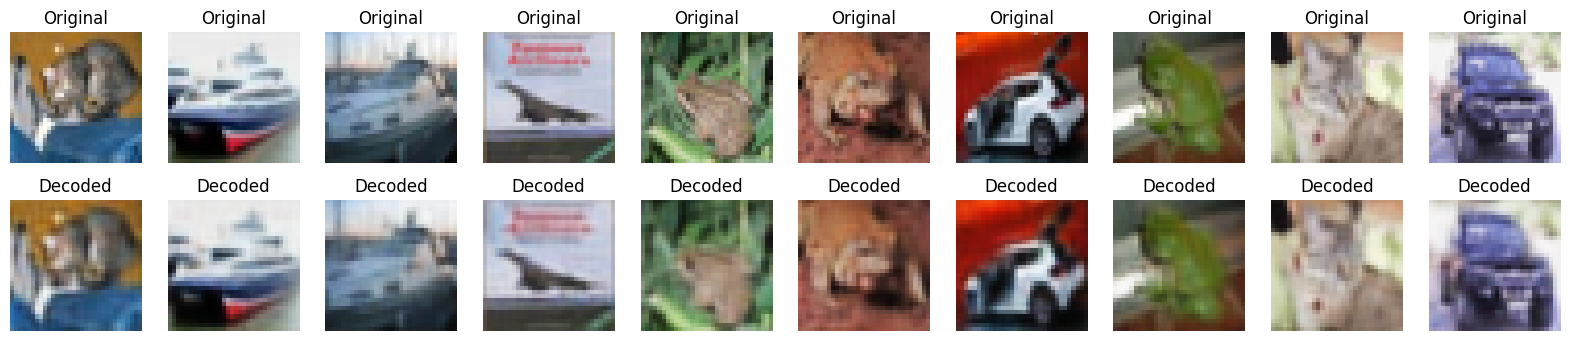

In [9]:
# Encode and decode some test images
decoded_imgs = autoencoder.predict(x_test)

# Display original and decoded images
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title('Original')
    plt.axis('off')

    # Decoded images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title('Decoded')
    plt.axis('off')

plt.show()

In [9]:
shttps://drive.google.com/drive/folders/1VkyaySewITLRDYJBdcyxCMSYXmWKNakq